In [17]:
import numpy as np
from PIL import *
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection,imshow_collection
# from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc


In [14]:
import skimage, PIL, numpy
print(skimage.__version__)
print(PIL.__version__)
print(numpy.__version__)

0.24.0
11.0.0
2.1.3


453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


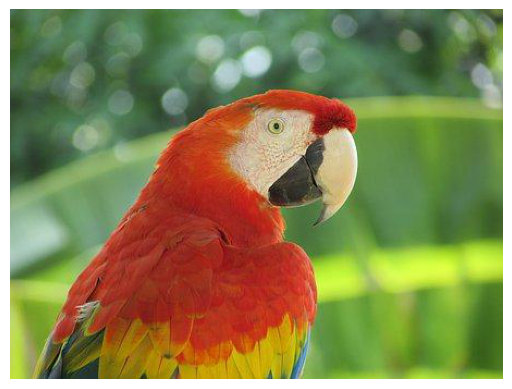

In [20]:
im = Image.open("./images/parrot.png") 
print(im.width, im.height, im.mode, im.format, type(im))
im.show()

# Hiển thị bức ảnh bằng Matplotlib
plt.imshow(im)  # Hiển thị bức ảnh đã mở
plt.axis('off')  # Tắt hiển thị trục tọa độ x và y để ảnh nhìn đẹp hơn
plt.show()  # Hiển thị bức ảnh trong một cửa sổ đồ họa

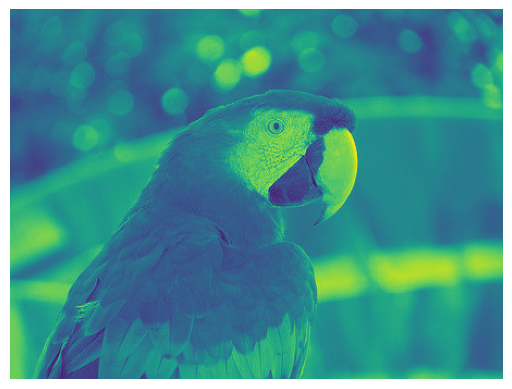

In [21]:
im_g = im.convert('L') # convert the RGB color
im_g.save('./images/parrot_gray.png') # save the image to disk
Image.open("./images/parrot_gray.png").show()

# Hiển thị bức ảnh bằng Matplotlib
plt.imshow(im_g)  # Hiển thị bức ảnh đã mở
plt.axis('off')  # Tắt hiển thị trục tọa độ x và y để ảnh nhìn đẹp hơn
plt.show()  # Hiển thị bức ảnh trong một cửa sổ đồ họa

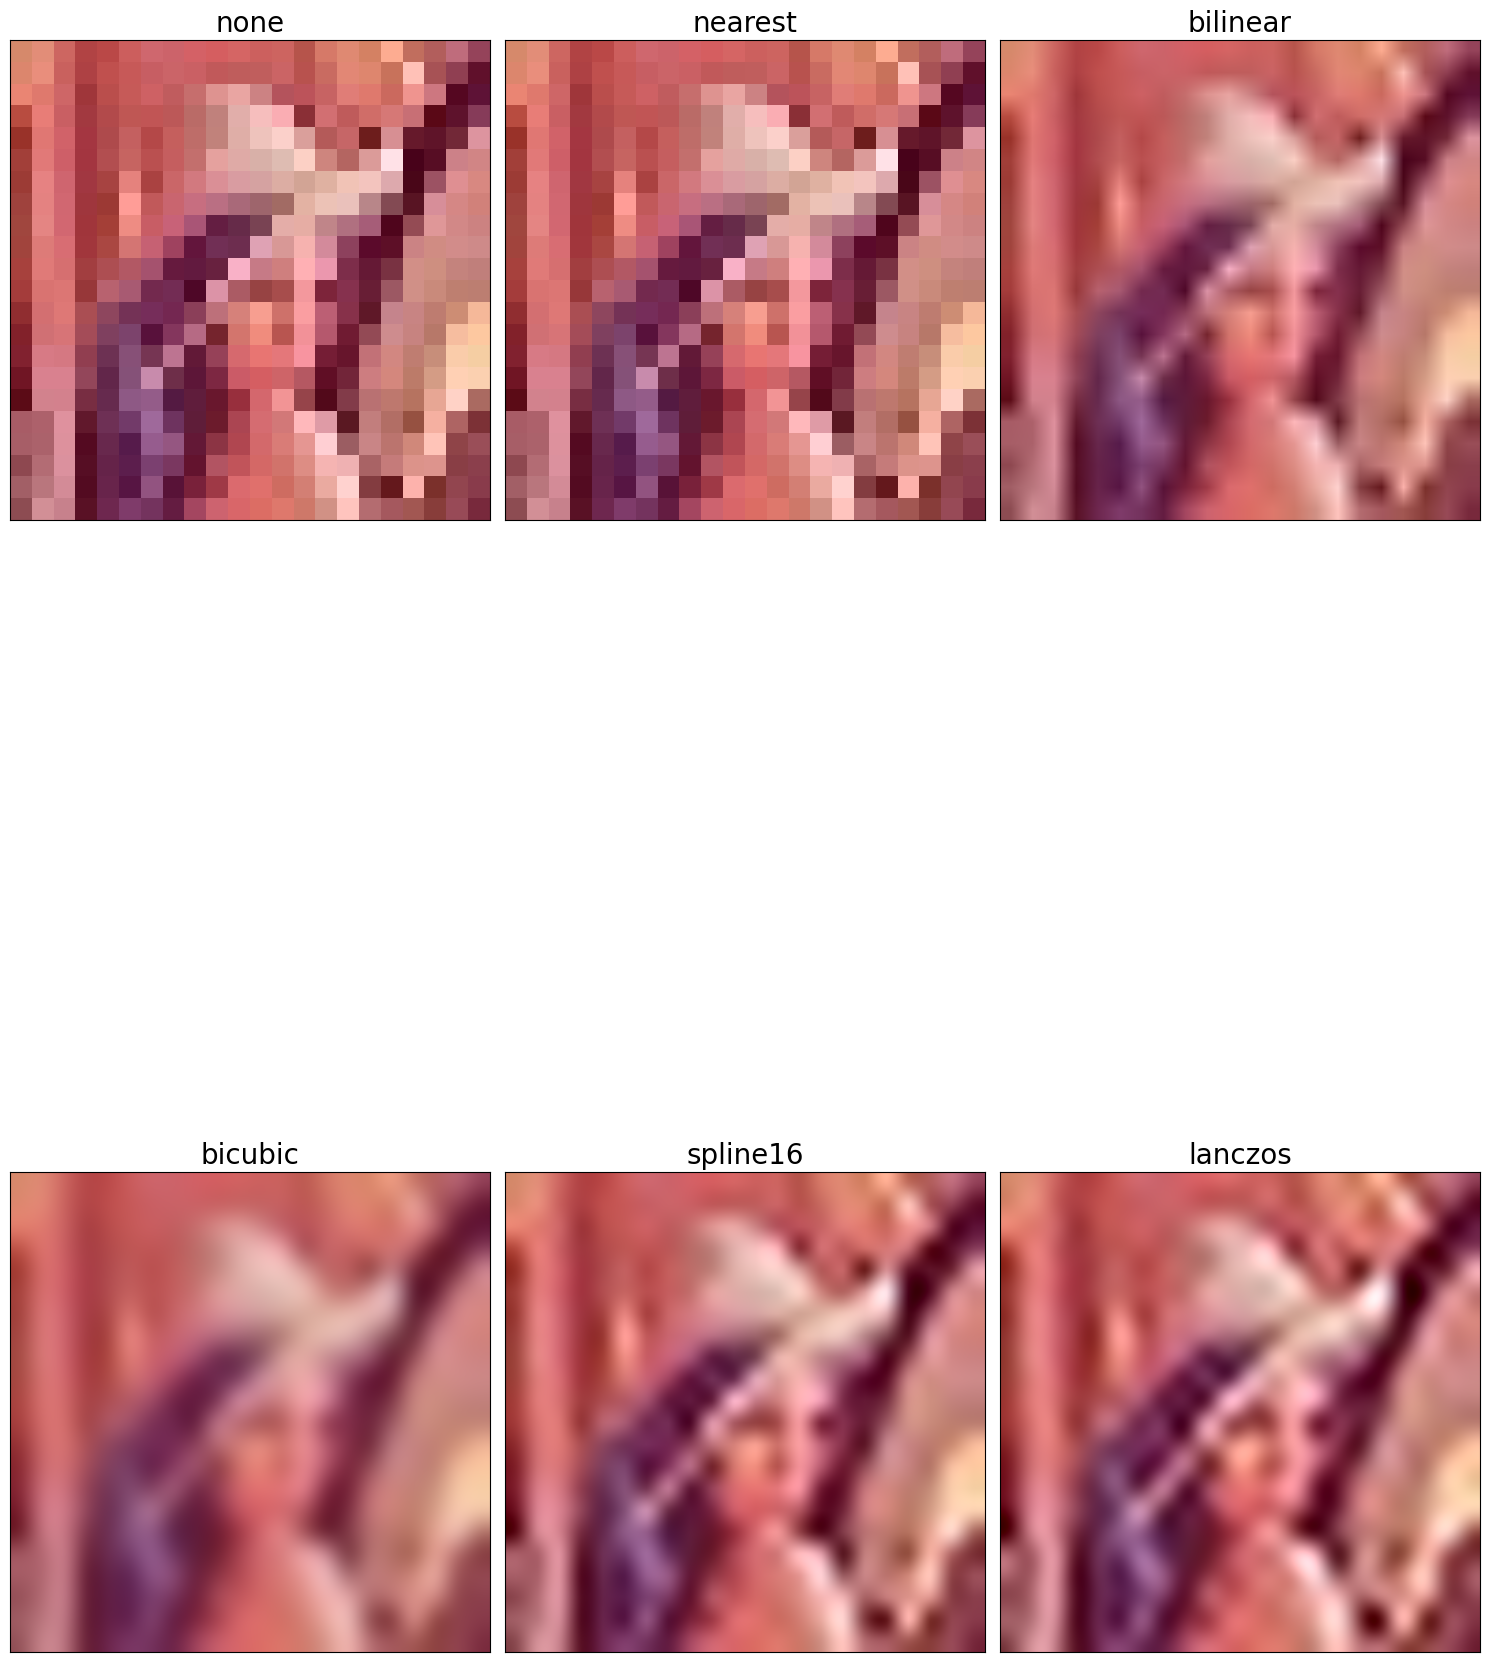

In [24]:
im = mpimg.imread("./images/lena_small.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 30),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()


Converting from one image mode into another

In [25]:
im = imread("images/parrot.png", as_gray=True)
print(im.shape)


(340, 453)


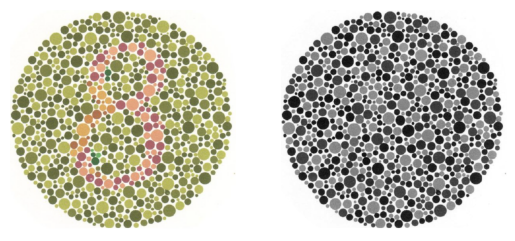

In [27]:
im = imread("./images/Ishihara.png")
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()


Converting from one color space into another

<Figure size 640x480 with 0 Axes>

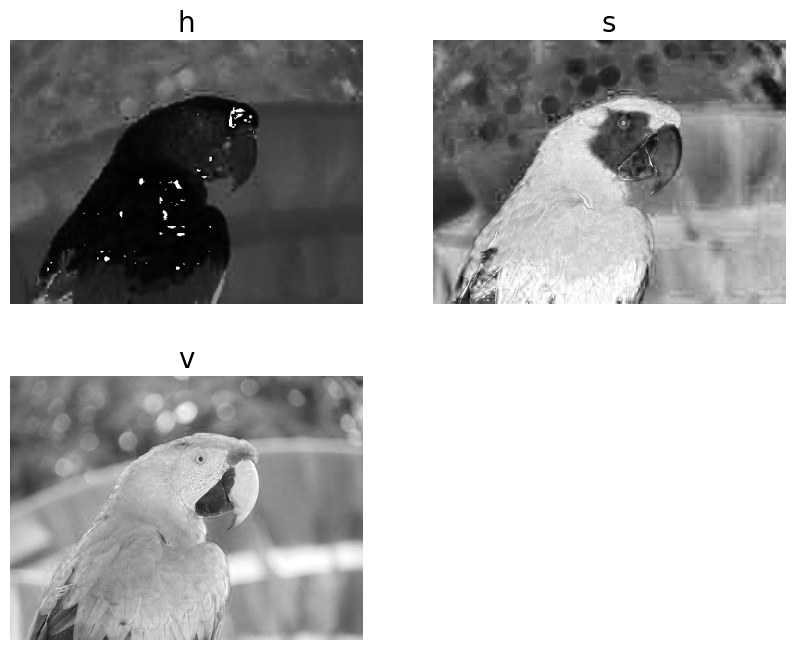

In [28]:
im = imread("./images/parrot.png")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()


Image manipulations with numpy array slicing

[180  76  83]


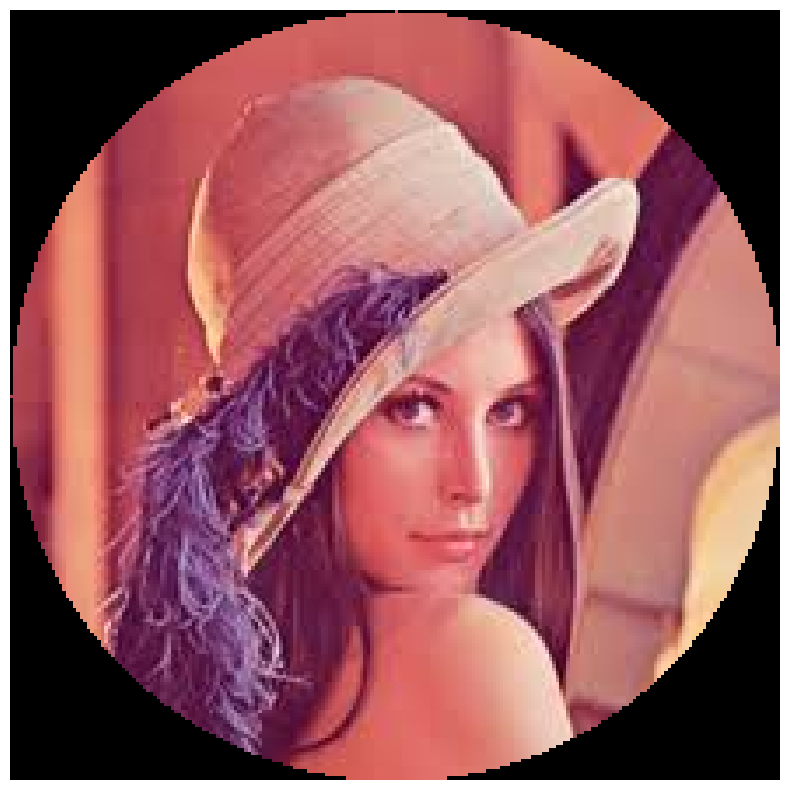

(<matplotlib.image.AxesImage at 0x27602b3aa50>,
 (np.float64(-0.5), np.float64(219.5), np.float64(219.5), np.float64(-0.5)),
 None)

In [31]:
lena = mpimg.imread("./images/lena.jpg").copy()  # Đọc ảnh và cho phép chỉnh sửa
print(lena[0, 40])  # Lấy giá trị pixel tại vị trí [0, 40]
lx, ly, _ = lena.shape  # Lấy kích thước ảnh
X, Y = np.ogrid[0:lx, 0:ly]  # Tạo lưới tọa độ
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4  # Tạo mặt nạ (mask)
lena[mask, :] = 0  # Áp dụng mặt nạ: vùng ngoài hình tròn được đặt thành 0
plt.figure(figsize=(10, 10))
plt.imshow(lena), plt.axis('off'), plt.show()


Drawing contour lines for an image

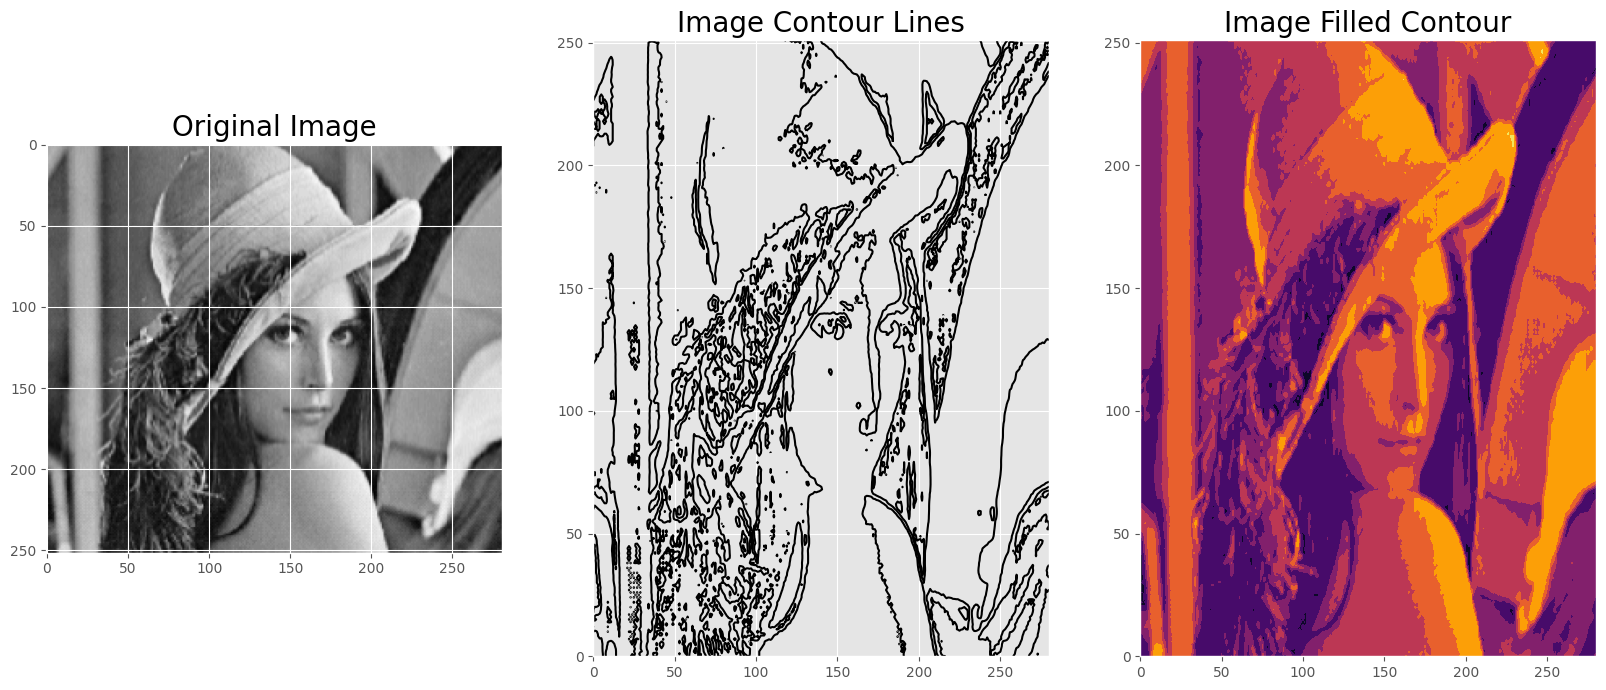

In [52]:
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

im = imread("./images/lena_g.png")  # read the image from disk as a numpy ndarray

# Nếu ảnh đã là ảnh grayscale, bạn có thể bỏ qua rgb2gray
if len(im.shape) == 3 and im.shape[2] == 3:  # Nếu ảnh là RGB
    im = rgb2gray(im)

plt.figure(figsize=(20, 8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k', levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20), plt.contourf(np.flipud(im), cmap='inferno')
plt.show()
